In [3]:
import sys
sys.path.append("..") 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
from scipy.stats import norm, entropy
from densne import run_densne

### Generate data over the 2D grid and plot

In [4]:
# Generate data over the 2D grid (Gaussian)
NUM_POINTS = 10000
t_G = np.random.normal(9, 3, NUM_POINTS)
X_G = np.zeros((NUM_POINTS, 2))
X_G[:, 0] = 0.04 * t_G * np.sin(t_G) + np.random.normal(0, 0.01, NUM_POINTS)
X_G[:, 1] = 0.04 * t_G * np.cos(t_G) + np.random.normal(0, 0.01, NUM_POINTS)

In [5]:
# Generate data over the 2D grid (uniform)
NUM_POINTS = 10000
t_U = np.random.uniform(3, 15, NUM_POINTS)
X_U = np.zeros((NUM_POINTS, 2))
X_U[:, 0] = 0.04 * t_U * np.sin(t_U) + np.random.normal(0, 0.01, NUM_POINTS)
X_U[:, 1] = 0.04 * t_U * np.cos(t_U) + np.random.normal(0, 0.01, NUM_POINTS)

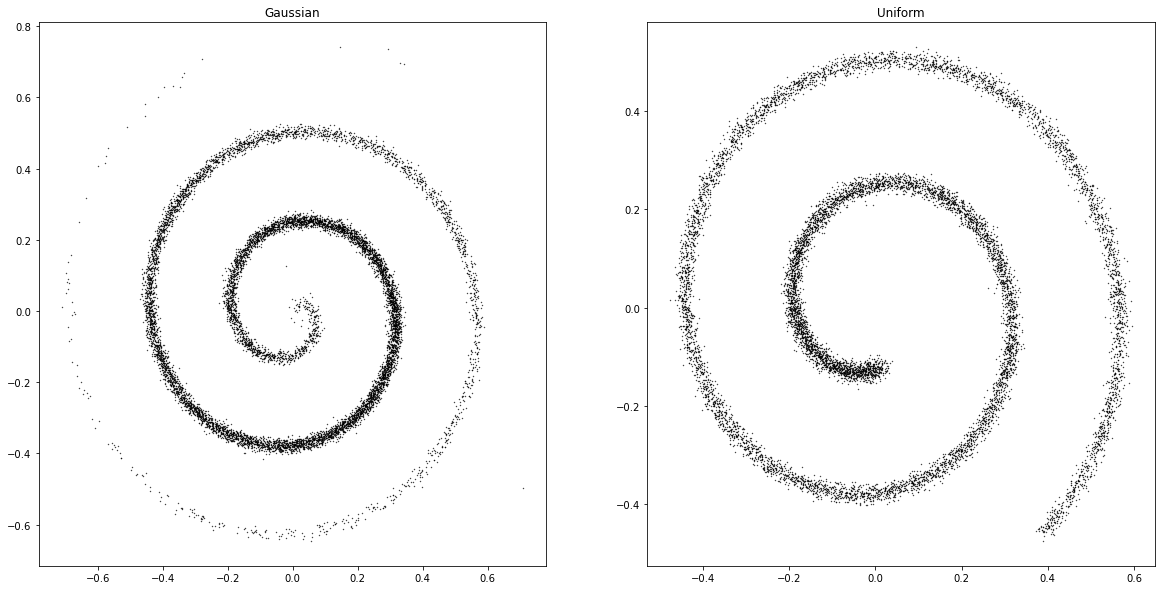

In [6]:
fig, ax = plt.subplots(1,2,figsize=[20,10])

ax[0].scatter(X_G[:, 0], X_G[:, 1], c='k', marker='.', s=0.5)
ax[0].set_title('Gaussian')

ax[1].scatter(X_U[:, 0], X_U[:, 1], c='k', marker='.', s=0.5)
ax[1].set_title('Uniform')

plt.show()

### Manifold learning using t-SNE

In [7]:
t_emb, t_ro, t_re = run_densne(X_G, perplexity=50, verbose=False, initial_dims=X_G.shape[1],
                               dens_frac=0, use_pca=False, max_iter=1000, dens_lambda=0,
                               final_dens=True)

In [8]:
params = {'bandwidth': np.logspace(-1, 3, 40)}
t_grid = GridSearchCV(KernelDensity(), params)
t_grid.fit(t_emb)
print("best bandwidth 1d: {0}".format(t_grid.best_estimator_.bandwidth))
t_kde = t_grid.best_estimator_

In [ ]:
xplot = np.linspace(0, 20, 500).reshape(-1,1)
den_g = norm.pdf(xplot, 9 , 3)
den_t_kde = t_kde.score_samples(xplot)

In [ ]:
fig, ax = plt.subplots(2,1,figsize=[10,20])
ax[0].plot(xplot, den_g, marker='.', linewidth=0.001, c="b", label='Gaussian')
ax[1].plot(xplot, np.exp(den_kde), marker='.', linewidth=0.001, c="r", label='KDE')

ax[0].tick_params(labelsize = 10)
ax[1].tick_params(labelsize = 10)

ax[0].set_ylabel('P(x)')
ax[1].set_ylabel('P(x)')

ax[0].set_xlabel('x')
ax[1].set_xlabel('x')

plt.show()

In [ ]:
t_KL  = entropy(den_g.flatten(), np.exp(den_t_kde))
print("KL divergence: {0}".format(t_KL))